# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
# print(boston['DESCR'])   # descripción del dataset
# boston['data']           # matriz con los datos de entrada (atributos)
# boston['target']         # vector de valores a predecir
# boston['feature_names']  # nombres de los atributos para cada columna de 'data'

In [4]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

Creamos un dataframe por si es de utilidad posteriormente


In [5]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df["MEDV"] = pd.DataFrame(boston.target)

In [6]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [7]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

### 1.1 ¿De qué se trata el conjunto de datos?
Este conjunto de datos contiene información recolectada por el servicio de Censo de Estados Unidos en el área de Boston. Refiere principalmente a los valores de las propiedades en dicha región, y contiene únicamente 506 filas.

### 1.2 ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
La variable objetivo es el MEDV. Representa el valor medio de las propiedades, en miles de dólares.

### 1.3 ¿Qué información (atributos) hay disponibles para hacer la predicción?

Los atributos disponibles para predecir son los siguientes:
* CRIM: la taza de crimen per capita por barrio
* ZN: proporción de tierra residencial, para lotes mayores a 25000 pies cuadrados
* INDUS: proporción de hectáreas comerciales por barrio
* CHAS: variable fictia del Río Charles. Vale 1 si el tramo limita con el río, si no 0.
* NOX: concentración de óxido nítrico, en partes por millón.
* RM: promedio de habitaciones por vivienda.
* AGE: proporción de viviendas ocupadas por sus propietarios construidas antes de 1940.
* DIS: distancias ponderadas a los cinco centros de empleo de Boston.
* RAD: índice de accesibilidad a las autopistas ¿radiales?
* TAX: tasa de impuesto a la propiedad por cada $10.000.
* PTRATIO: proporción estudiante-docente por barrio.
* B: 1000.(Bk - 0,63)^2 siendo Bk la proporción de población negra por barrio.
* LSTAT: porcentaje de población de menor status.

### 1.4 ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
Creemos que los más determinantes serán:
* RM (habitaciones por vivienda)
* LSTAT (porcentaje de gente con ingresos más bajos)
* DIS (distancia a los principales centros)
* TAX (impuestos)
* INDUS (proporción de hectáreas comerciales por barrio)


### 1.5 ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.
Nos parece problemática la decisión de utilizar algunas variables como: 
* `B`, la cual hace referencia a la proporción de población negra.
* `LSTAT`, porque no sabemos cómo miden el status.

A su vez, el tamaño de la muestra parece demasiado pequeño como para que sea significativo para su estudio y predicción. 
Por otra parte, el dataset es antiguo, por lo que quedaría obsoleto para 
futuras predicciones.

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

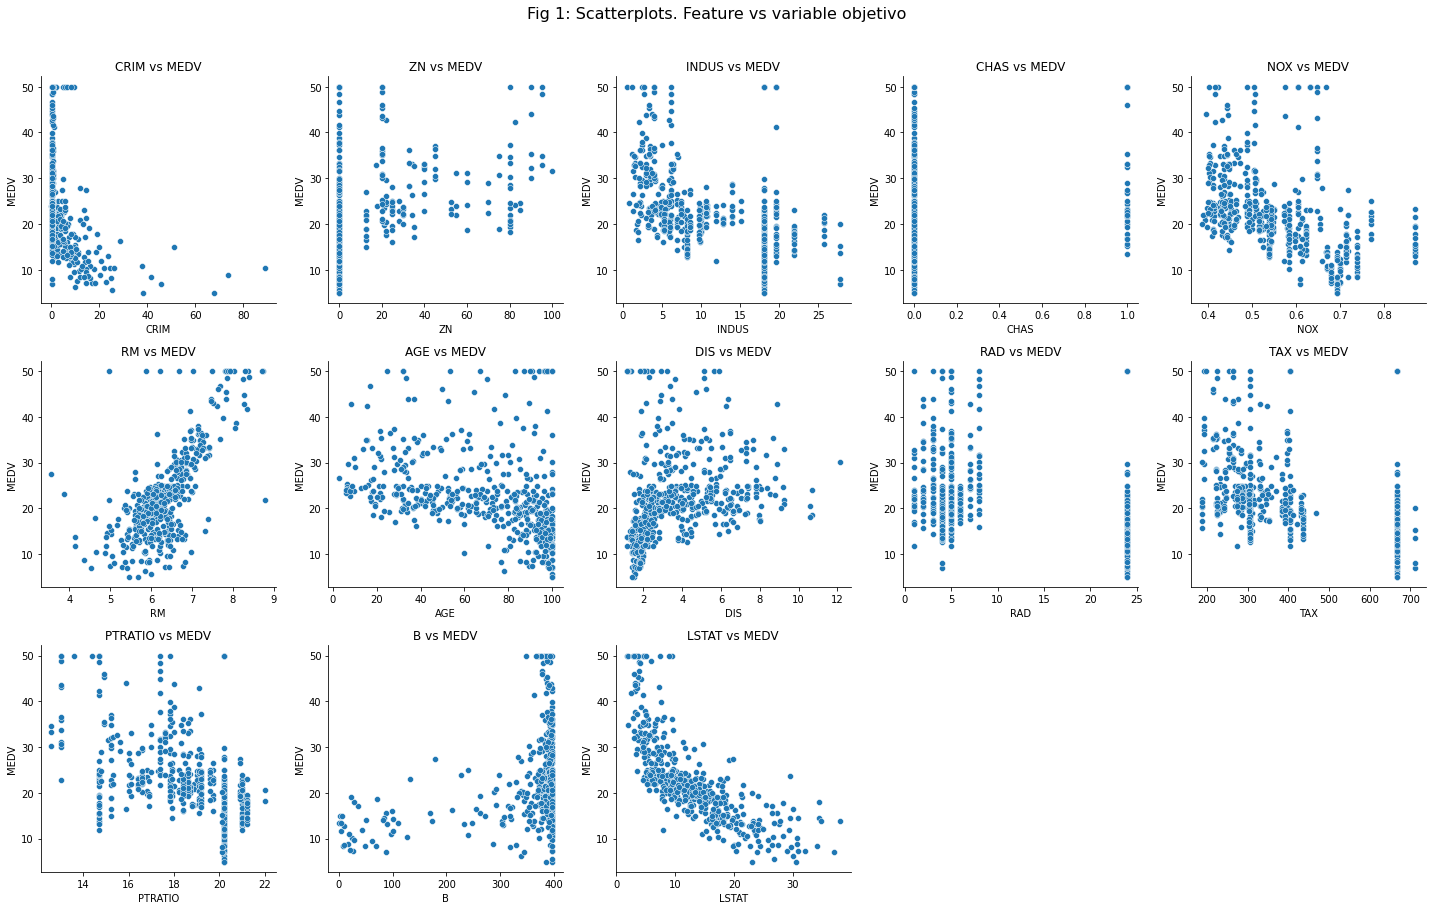

In [8]:
fig, axes = plt.subplots(3,5,figsize=(20,12))
axes = axes.ravel()
for i, col in enumerate(boston_df.columns[:-1]):
    axes[i].set_title(f'{col} vs MEDV')
    sns.scatterplot(ax=axes[i], x=boston_df[col], y=boston_df['MEDV'],)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['top'].set_visible(False)

fig.suptitle('Fig 1: Scatterplots. Feature vs variable objetivo', fontsize=16, y=1.05)
fig.subplots_adjust(hspace=0.3)
#fig.subplots_adjust(top=4)
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])
fig.tight_layout();


In [9]:
# print("Fig. 1")
# for feature in boston['feature_names']:
#   selector = (boston['feature_names'] == feature)
#   plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
#   plt.title(feature)
#   plt.show()

Los atributos que nos parecen más importantes en cuanto a información y para predicción son:

1. LSTAT: a mayor porcentaje de población con bajos ingresos, menos valen las viviendas.
2. RM: a mayor cantidad de habitaciones, mayor precio de la vivienda
3. NOX (porcentaje de oxido nitrico - contaminación): A mayor nivel de contaminación, menor precio de las viviendas.
4. CRIM (tasa de crimen): vemos que a mayor tasa, las casas valen menos.


## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [10]:
# 1. Selección de atributo LSTAT
feature = 'LSTAT'
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

((404, 1), (102, 1))

In [11]:
# 2. Instancia y entrenamiento.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train_f, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# 3. Predicción y evaluación.
y_test_predict = lin_model.predict(X_test_f)
mse = mean_squared_error(y_test, y_test_predict)
mse

46.336305360025925

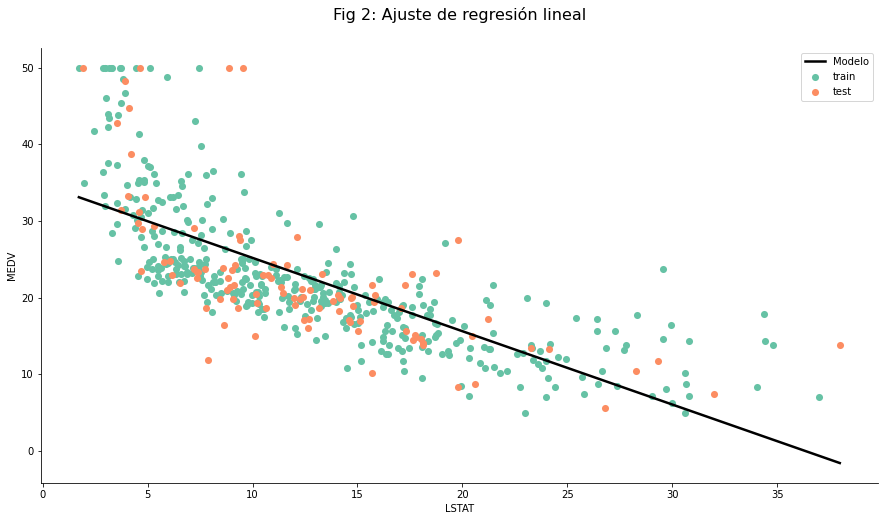

In [13]:
fig, axes = plt.subplots(figsize=(15,8))
c = sns.color_palette("Set2", 3)
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
sns.lineplot(x=x.ravel(), y=lin_model.predict(x), label='Modelo', lw=2.5, color='k')
sns.scatterplot(x=X_train_f.ravel(), y=y_train.ravel(), color=c[0], label="train", s=50, linewidth=0)
sns.scatterplot(x=X_test_f.ravel(), y=y_test.ravel(), color=c[1], edgecolor="k", label="test", s=50, linewidth=0)
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.title('Fig 2: Ajuste de regresión lineal', fontsize=16, y=1.05);


En este gráfico (Fig 2) se puede observar como a medida que aumenta `LSTAT` disminuye el valor de las propiedades. 
En color verde se pueden observar los datos que se utilizaron para entrenar el modelo, y en color naranja, los datos que se utilizaron para el testeo del mismo. En color negro se observa el modelo lineal que mejor ajustaría a este conjunto de datos en estudio. 

In [14]:
# # 4. Gráfico.
# print("Fig. 2")

# x_start = min(np.min(X_train_f), np.min(X_test_f))
# x_end = max(np.max(X_train_f), np.max(X_test_f))
# x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
# plt.plot(x, lin_model.predict(x), color="tomato", label="modelo")

# plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
# plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
# plt.title(feature)
# plt.legend()
# plt.show()

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [16]:
train_errors = []
test_errors = []
degrees = range(1,11)

for degree in degrees:
  pf = PolynomialFeatures(degree)
  lr = LinearRegression(fit_intercept=False)
  model = make_pipeline(pf, lr)
  model.fit(X_train_f, y_train)
  y_train_pred = model.predict(X_train_f)
  y_test_pred = model.predict(X_test_f)
  train_error = mean_squared_error(y_train, y_train_pred)
  #print(f'Train error: {train_error.round(2)}')
  train_errors.append(train_error)
  test_error = mean_squared_error(y_test, y_test_pred)
  #print(f'Test error: {test_error.round(2)}')
  test_errors.append(test_error)
  print(f'Para grado {degree}: Error en train {train_error.round(2)} , Error en test {test_error.round(2)}')


Para grado 1: Error en train 36.52 , Error en test 46.34
Para grado 2: Error en train 28.19 , Error en test 38.85
Para grado 3: Error en train 26.78 , Error en test 37.22
Para grado 4: Error en train 25.85 , Error en test 34.7
Para grado 5: Error en train 25.03 , Error en test 34.83
Para grado 6: Error en train 25.01 , Error en test 34.33
Para grado 7: Error en train 25.01 , Error en test 34.26
Para grado 8: Error en train 24.85 , Error en test 36.42
Para grado 9: Error en train 24.83 , Error en test 34.92
Para grado 10: Error en train 30.35 , Error en test 61.43


**4.3**
Vemos en el gráfico que a partir del grado 9 se genera un sobreajuste, por lo que el error de entrenamiento se mantiene casi constante, pero el de test se dispara. 

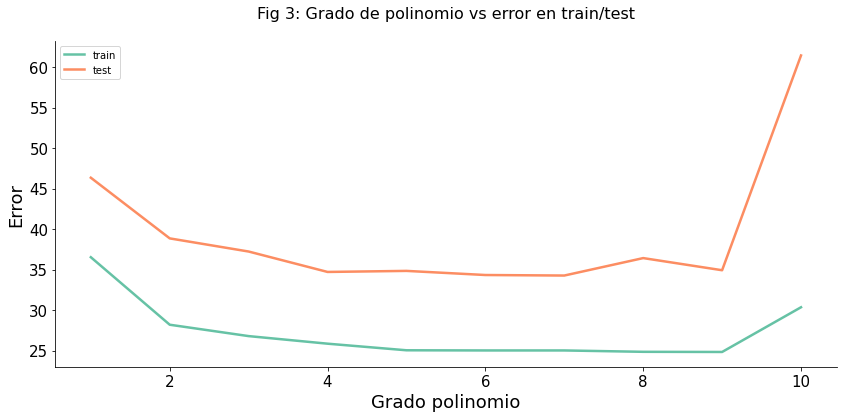

In [17]:
fig, axes = plt.subplots(figsize=(14,6))
c = sns.color_palette("Set2", 3)
sns.lineplot(x=degrees, y=train_errors, label='train', lw=2.5, color=c[0])
sns.lineplot(x=degrees, y=test_errors, label='test', lw=2.5, color=c[1])
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
axes.tick_params(axis='both', which='major', labelsize=15)
axes.tick_params(axis='both', which='minor', labelsize=15)
plt.xlabel('Grado polinomio', fontsize=18)
plt.ylabel('Error', fontsize=18)
plt.title('Fig 3: Grado de polinomio vs error en train/test', fontsize=16, y=1.05);

In [18]:
# print("Fig. 4")

# plt.figure(figsize = (10, 5))
# plt.scatter(X_train_f, y_train, color="blue", label="train")
# plt.scatter(X_test_f, y_test, color="white", edgecolor="k", label="test")
# plt.plot(x, model.predict(x.reshape(-1, 1)), color="red", label="model")
# plt.legend()
# plt.show()

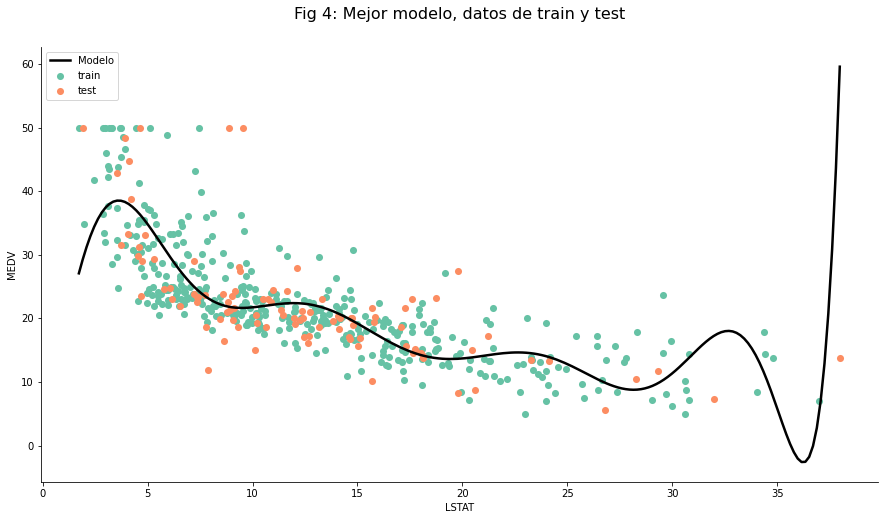

In [19]:
fig, axes = plt.subplots(figsize=(15,8))
c = sns.color_palette("Set2", 3)
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
sns.lineplot(x=x.ravel(), y=model.predict(x.reshape(-1, 1)), label='Modelo', lw=2.5, color='k')
sns.scatterplot(x=X_train_f.ravel(), y=y_train.ravel(), color=c[0], label="train", s=50, linewidth=0)
sns.scatterplot(x=X_test_f.ravel(), y=y_test.ravel(), color=c[1], edgecolor="k", label="test", s=50, linewidth=0)
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.title('Fig 4: Mejor modelo, datos de train y test', fontsize=16, y=1.05);

In [20]:
print(f'Error en train {train_errors[3].round(2)}') 
print(f'Error en train {test_errors[3].round(2)}') 

Error en train 25.85
Error en train 34.7


***4.5***

En este ejercicio ajustamos una regresión polinómica tomando como feature o característica 'LSTAT',  y se ajustaron polinomios que van de grado 1 al grado 10. Es de esperar que a medida que aumente el grado del polinomio en los datos de training, el error disminuya, pero no así, los valores de test. Esta variación de los errores de train y test en las dos instancias se observa en la Fig. 3. 

En nuestro caso se selecciono un polinomio de grado 4 y es lo que se grafica en Fig. 4. Para elegir el grado óptimo de polinomio se tomo como criterio cuando la diferencia de error entre los datos de entrenamiento y testeo es mínima. 
Se puede observar como puntos en verde, los datos utilizados para el entrenamiento, en naranja los datos utilizados para el testeo y en color negro, el modelo que corresponde a un polinomio. 

Observamos también que, al aumentar el grado del polinomio, la función comienza a fluctuar tratando de ajustarse a más puntos. Esta situación se refleja más en los últimos puntos, donde hay mayor dispersión entre los mismos.

Si tuviésemos el error de cada dato, podríamos hacer un ajuste ponderado en el que se considere más a los que tienen menos error, y menos a los que tienen más. Con esto, el ajuste sería mejor. 


## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [21]:
# 1. Selección de atributos:

selector = (boston['feature_names'] == 'LSTAT') | (boston['feature_names'] == 'RM') | (boston['feature_names'] == 'NOX')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((404, 3), (102, 3))

In [22]:
# 2. 
train_errors_fs = []
test_errors_fs = []
degrees = range(1,11)

for degree in degrees:
  #print('Para grado', degree, ":")
  pf = PolynomialFeatures(degree)
  lr = LinearRegression(fit_intercept=False)
  model = make_pipeline(pf, lr)
  model.fit(X_train_fs, y_train)
  y_train_pred = model.predict(X_train_fs)
  y_test_pred = model.predict(X_test_fs)
  train_error = mean_squared_error(y_train, y_train_pred)
  #print(f'Train error: {train_error.round(2)}')
  train_errors_fs.append(train_error)
  test_error = mean_squared_error(y_test, y_test_pred)
  #print(f'Test error: {test_error.round(2)}')
  test_errors_fs.append(test_error)
  print(f'Para grado {degree}: Error en train {train_error.round(2)} , Error en test {test_error.round(2)}')


Para grado 1: Error en train 28.64 , Error en test 38.11
Para grado 2: Error en train 16.12 , Error en test 26.28
Para grado 3: Error en train 12.32 , Error en test 30.11
Para grado 4: Error en train 9.58 , Error en test 28.04
Para grado 5: Error en train 8.05 , Error en test 32.67
Para grado 6: Error en train 6.92 , Error en test 113.84
Para grado 7: Error en train 6.48 , Error en test 1594.48
Para grado 8: Error en train 6.57 , Error en test 702.64
Para grado 9: Error en train 33.67 , Error en test 145397.44
Para grado 10: Error en train 13.12 , Error en test 190969.01


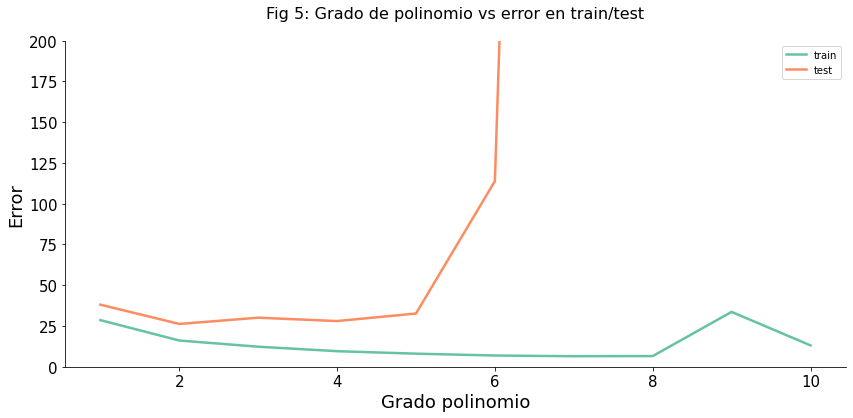

In [23]:
fig, axes = plt.subplots(figsize=(14,6))
c = sns.color_palette("Set2", 3)
sns.lineplot(x=degrees, y=train_errors_fs, label='train', lw=2.5, color=c[0])
sns.lineplot(x=degrees, y=test_errors_fs, label='test', lw=2.5, color=c[1])
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
axes.tick_params(axis='both', which='major', labelsize=15)
axes.tick_params(axis='both', which='minor', labelsize=15)
plt.xlabel('Grado polinomio', fontsize=18)
plt.ylabel('Error', fontsize=18)
plt.ylim(0, 200)

plt.title('Fig 5: Grado de polinomio vs error en train/test', fontsize=16, y=1.05);

In [24]:
print(f'Error en train {train_errors_fs[1].round(2)}') 
print(f'Error en train {test_errors_fs[1].round(2)}') 

Error en train 16.12
Error en train 26.28


In [25]:
# print("Fig. 5")

# plt.figure(figsize = (10,5))
# plt.plot(degrees, train_errors_fs, color="blue", label="train")
# plt.plot(degrees, test_errors_fs, color="red", label="test")
# plt.legend()
# plt.ylim(0, 200)
# plt.xlabel("degree")
# plt.ylabel("error")
# plt.show()

Lo más llamativo es que encontramos un modelo más simple (de grado 2) con menor error y con más atributos. 

Para los grados mayores, esta situación se invierte, ya que está tratando de encontrar un modelo que se ajuste a tres atritubos a la vez, por lo que el error para el test se dispara enormemente en comparación a lo del punto anterior.

Por otra parte, vemos que, en este caso, el modelo se ajusta mucho mejor a los datos de entrenamiento, pero para los del test se obtiene un error similar hasta el grado 5. 

En conclusión, la respuesta a si se obtuvieron mejores modelos es relativa. En los primeros grados podríamos decir que sí; luego de 5 ya no.

## Más ejercicios (opcionales)

### Ejercicio 7: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

### Ejercicio 8: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?


### Ejercicio 7

In [26]:
# 1. Selección de atributos:
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [27]:
# 2. 
train_errors_c = []
test_errors_c = []
degrees = range(1,5)

for degree in degrees:
  print('Para grado', degree, ":")
  pf = PolynomialFeatures(degree)
  lr = LinearRegression(fit_intercept=False)
  model = make_pipeline(pf, lr)
  model.fit(X_train, y_train)
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)
  train_error = mean_squared_error(y_train, y_train_pred)
  print(f'Train error: {train_error.round(2)}')
  train_errors_c.append(train_error)
  test_error = mean_squared_error(y_test, y_test_pred)
  print(f'Test error: {test_error.round(2)}')
  test_errors_c.append(test_error)

Para grado 1 :
Train error: 19.33
Test error: 33.45
Para grado 2 :
Train error: 4.34
Test error: 31.28
Para grado 3 :
Train error: 0.0
Test error: 976575.88
Para grado 4 :
Train error: 0.0
Test error: 950756.91


Este modelo de regresión polinómica utilizando todos los features del dataset sobreajusta a partir del grado 3 ya que la diferencia entre ambos errores (train y test) es considerable. 


Utilizando más features obtuvimos un mayor error en test que utilizando solamente 3. 

También vemos el patrón de que al aumentar los atributos, los grados útiles son cada vez menos: 
* con uno solo, podíamos considerar hasta el grado 9.
* con tres, funcionaba hasta grado 5.
* con todos, solo funciona hasta grado 2. 



# Conclusión

* En este trabajo se utilizó el Boston House Prices que se encuentra disponible en el UCI Machine Learning (https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). En el mismo se encuentran las descripciones de las variables que se detallan anteriormente. 

* En primera instancia se realizó una visualización de tipo exploratoria (scatterplot o dispersograma) de todas las variables o features del dataset y tomando como eje de las ordenadas, la variable que nos interesa predecir mediante la regresión, el decir, el precio medio de las casas. Esto se puede observar en Fig 1. 

* A partir de esta visualización intuimos que las variables que mejor podrían funcionar como variables dependientes son: `LSTAT`, `RM`, `NOX`, `CRIM`. 

* Luego para realizar una regresión lineal simple (es decir, utilizando una sola variable independiente), elegimos la variable `LSTAT`. El MSE (mean square error) nos dio como resultado 46.33. El gráfico correspondiente a este análisis se encuentra en la Fig 2. 

* En una siguiente instancia, se realizó una regresión polinómica variando el grado del polinomio desde 1 a 10. La variable seleccionada en este caso es la misma que la anterior, es decir, `LSTAT`. Cabe destacar acá, que el error de testeo para un grado de polinomio 1 es el mismo para una regresión lineal simple, entendiendo que se trata del mismo modelo. En las curvas de error correspondiente (Fig 3), se observa que el error de train y test disminuyen hasta un cierto valor (aprox 9), y luego ahi empieza a haber sobreajuste de los datos. 

* En nuestro caso, nosotros elegimos el grado 4 como el grado que mejor polinomio que ajustaba los datos. Eso se puede observar en la Fig 4. 

* Luego, aparte de la variable `LSTAT` se tomaron las variables `RM` y `NOX` para la regresión polinómica. 
En este caso, tomamos como mejor grado del polinomio, al grado 2, ya que tomando en consideración las curvas de error y los valores de train / test, vemos que para el grado 2, la diferencia entre ambos es mínima. 
A partir del grado 5, esa diferencia empieza a aumentar, y estamos ante un caso de sobreajuste los datos. 

* En la parte opcional, hicimos la regresión polinómica con todos los features de dataset, y observamos que a partir del grado 3, el train error es de 0, pero el error de testeo sube considerablemente (976575.88). 

* En todos los casos de regresión estudiadas, la métrica seleccionada para evaluar la bondad del ajuste es el MEAN SQUARE ERROR, o error cuadrático medio. 

Lo que se observa como resultado de todas estas instancias de análisis es que al aumentar el número de features, era menor el grado de polinomio óptimo para evitar que exista sobreajuste en los datos. 
